In [127]:
import pandas as pd
# load data
# df_trades_BTC = pd.read_csv('Data/trades_BitBay_BTCPLN.csv', index_col=0, usecols=['date','price', 'type', 'amount'], header=0, engine='python')
# df_trades_BTC.index = pd.to_datetime(df_trades_BTC.index, unit='s')
# print(df_trades_BTC.tail(5))

# df_trades_ETH = pd.read_csv('Data/trades_BitBay_ETHPLN.csv', index_col=0, usecols=['date','price', 'type', 'amount'], header=0, engine='python')
# df_trades_ETH.index = pd.to_datetime(df_trades_ETH.index, unit='s')
# print(df_trades_ETH.tail(5))

df_trades_BTC_GDAX = pd.read_csv('Data/trades_GDAX_BTC-EUR.csv', index_col=3, usecols=['price','side','size','time','trade_id'], header=0, engine='python')
df_trades_BTC_GDAX.index = pd.to_datetime(df_trades_BTC_GDAX.index, infer_datetime_format=True)
print(df_trades_BTC_GDAX.tail(5))

                           price  side      size  trade_id
time                                                      
2018-02-27 18:19:05.169  8660.84  sell  0.020000  12587200
2018-02-27 18:19:05.169  8661.36  sell  0.002374  12587201
2018-02-27 18:19:05.169  8663.40  sell  1.762565  12587202
2018-02-27 18:19:12.498  8663.60  sell  0.035000  12587203
2018-02-27 18:19:12.498  8663.60  sell  0.015000  12587204


In [29]:
import numpy as np
frequency = '5min'

def sma(df, window):
    return df['close'].rolling(window=window).mean()

def resample_df(df, frequency = '1H', window1 = 6, window2 = 40):
    one_hot = pd.get_dummies(df['type'])
    df = df.join(one_hot)

    df_pv = df.resample(frequency).agg({'price': np.mean, 'amount': np.sum, 'buy': np.sum, 'sell': np.sum})
    df_ohlc = df['price'].resample(frequency).ohlc()

    df = pd.concat([df_pv, df_ohlc], axis=1)
    df = df.fillna(method='pad')
    df = df.dropna()
    
    df['SMA(24)'] = df['price'].rolling(24).mean()
    df['SMA(12)'] = df['price'].rolling(12).mean()
    
    return df

df = resample_df(df_trades_ETH, frequency)

print(df.tail(5))

                     sell  buy       price     amount   open   high    low  \
date                                                                         
2017-07-07 16:15:00   0.0  1.0  910.500000   1.000000  910.5  910.5  910.5   
2017-07-07 16:20:00   0.0  3.0  911.300000   0.318593  911.3  911.3  911.3   
2017-07-07 16:25:00   1.0  3.0  909.775000   2.290319  911.3  911.5  905.0   
2017-07-07 16:30:00   0.0  9.0  911.733333  12.284541  911.5  912.0  911.3   
2017-07-07 16:35:00   0.0  2.0  911.650000   5.403865  911.3  912.0  911.3   

                     close     SMA(24)     SMA(12)  
date                                                
2017-07-07 16:15:00  910.5  915.965586  912.946729  
2017-07-07 16:20:00  911.3  915.765503  911.825062  
2017-07-07 16:25:00  905.0  915.501878  911.306312  
2017-07-07 16:30:00  911.3  914.786183  911.346382  
2017-07-07 16:35:00  912.0  914.590836  911.067215  


C:\ProgramData\Anaconda3\envs\python3.5\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,adjust=True,ignore_na=False,span=3).mean()
  """


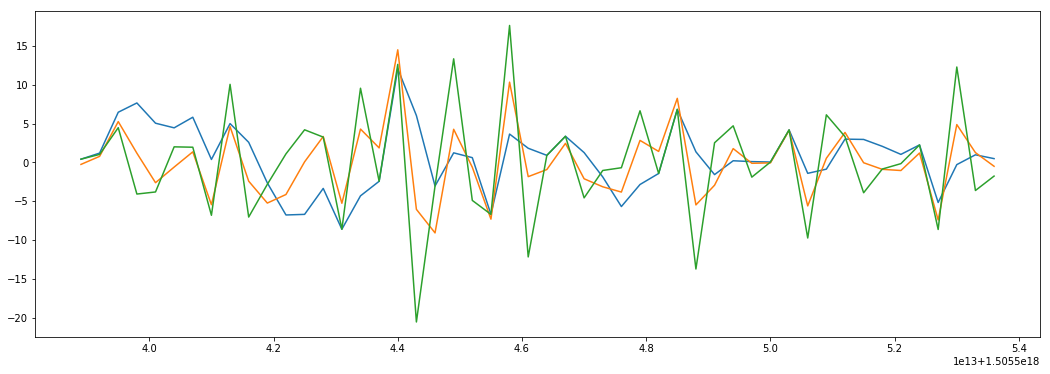

In [31]:
# from scipy.signal import savgol_filter

# savgol_filter(df['price'], 5, 2, mode='nearest')

ewma = pd.ewma(df['price'], span = 3)
der1 = ewma.diff()
der2 = der1.diff()
der3 = der2.diff()
der4 = der3.diff()
der5 = der4.diff()



import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (18,6)

# plt.plot(df['price'][-50:])
# plt.plot(ewma[-50:])
plt.plot(der1[-50:])
plt.plot(der2[-50:])
plt.plot(der3[-50:])
plt.show()

In [12]:
# # create and load model
# batch_size = 1
# model = Sequential()
# # model.add(LSTM(4, batch_input_shape=(batch_size, look_back, features), stateful=True, return_sequences=True))
# model.add(LSTM(4, batch_input_shape=(batch_size, look_back, features), stateful=True))
# model.add(Dense(1))
# # try:
# #     model.load_weights("model_forward.h5")
# # except:
# #     pass
# model.compile(loss='mean_squared_error', optimizer='adam')

                        price  type    amount
date                                         
2014-03-31 21:17:31   1520.00   buy  0.210000
2014-04-02 21:25:20   1472.00  sell  0.266047
2014-04-03 14:02:09   1390.00  sell  0.254500
2014-04-03 14:02:09   1385.00  sell  0.219700
2014-04-03 14:36:42   1400.00   buy  0.039735
2014-04-03 14:56:02   1381.00  sell  0.254700
2014-04-03 14:57:49   1415.00   buy  0.093592
2014-04-03 14:57:49   1422.00   buy  0.049632
2014-04-03 14:57:49   1419.00   buy  0.059951
2014-04-04 08:47:20   1379.50  sell  0.087960
2014-04-04 08:48:34   1411.68   buy  0.088065
2014-04-04 09:03:14   1415.00   buy  0.088065
2014-04-04 09:52:56   1410.00  sell  0.209504
2014-04-04 09:54:01   1406.00  sell  0.089700
2014-04-04 09:54:22   1405.00  sell  0.078700
2014-04-04 10:43:42   1384.00  sell  0.072000
2014-04-04 13:42:09   1430.00  sell  0.120000
2014-04-09 08:27:23   1386.20  sell  0.080000
2014-04-09 08:32:47   1386.35  sell  0.045063
2014-04-09 19:39:03   1383.00  sel

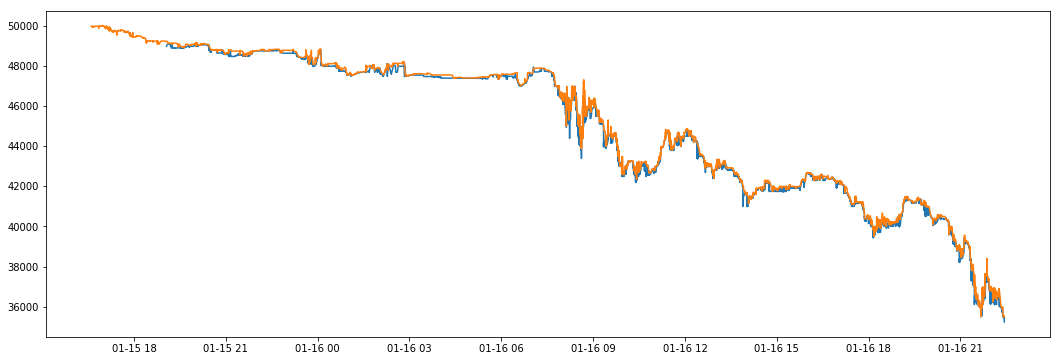

In [13]:
print(df_trades_BTC[df_trades_BTC.index.duplicated()])

df_sell = df_trades_BTC.loc[df_trades_BTC['type'] == 'sell']
print(df_sell.tail(5))

df_buy = df_trades_BTC.loc[df_trades_BTC['type'] == 'buy']
print(df_buy.tail(5))

plt.plot(df_sell['price'][-10000:])
plt.plot(df_buy['price'][-10000:])
plt.show()

In [23]:
highs = []
lows = []

data = df.iloc[-10000:]

for index, row in data.iterrows():
    highs.append(row['high']/row['price']-1)
    lows.append(row['low']/row['price']-1)
    
h_max = max(highs)
h_min = min(highs)
l_max = max(lows)
l_min = min(lows)

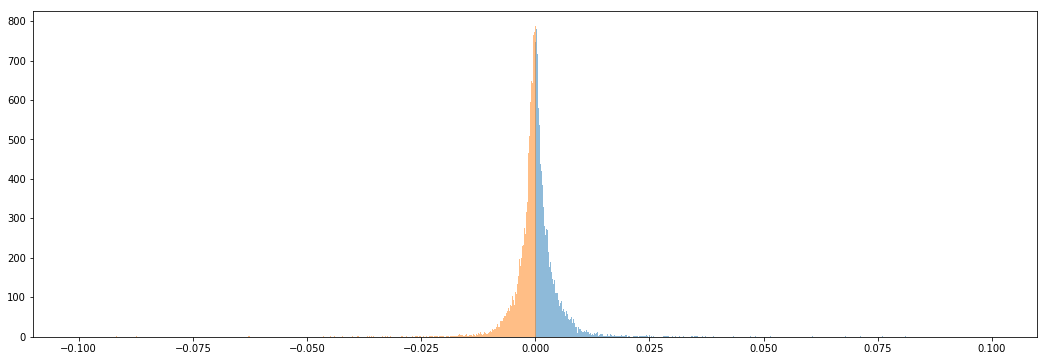

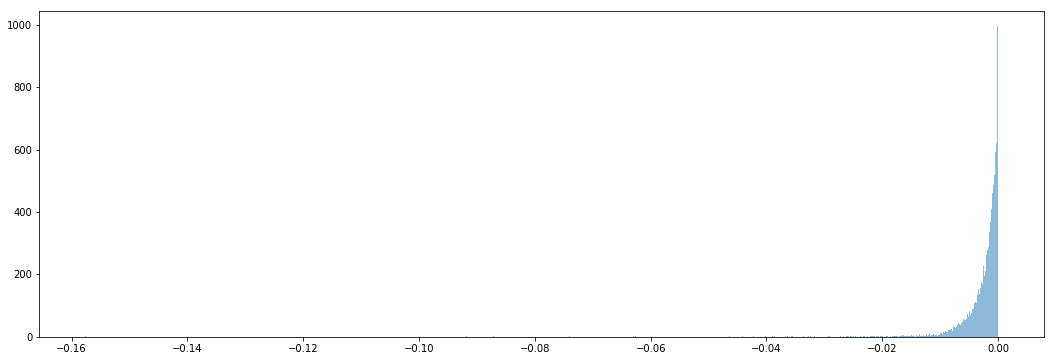

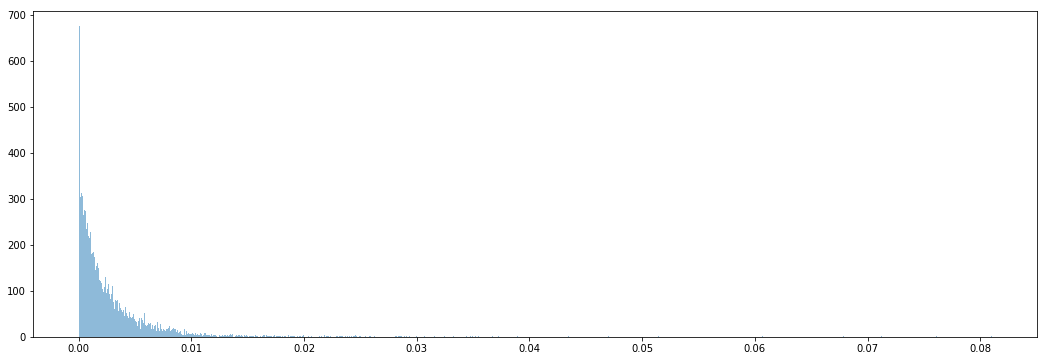

In [24]:
bins = np.linspace(-0.1, 0.1, 1000)

plt.hist(highs, bins, alpha=0.5)
plt.hist(lows, bins, alpha=0.5)
plt.show()

bins_l = np.linspace(l_min, l_max, 1000)
n, bins, patches = plt.hist(lows, bins_l, alpha=0.5)
plt.show()

bins_h = np.linspace(h_min, h_max, 1000)
plt.hist(highs, bins_h, alpha=0.5)
plt.show()

In [146]:
import datetime
import talib
import random

def resample_df_GDAX(df, frequency = '1H', window1 = 6, window2 = 40):
    one_hot = pd.get_dummies(df['side'])
    df = df.join(one_hot)

    df_pv = df.resample(frequency).agg({'price': np.mean, 'size': np.sum, 'buy': np.sum, 'sell': np.sum})
    df_ohlc = df['price'].resample(frequency).ohlc()

    df = pd.concat([df_pv, df_ohlc], axis=1)
    df = df.fillna(method='pad')
    df = df.dropna()
    
    df['SMA(24)'] = df['price'].rolling(24).mean()
    df['SMA(12)'] = df['price'].rolling(12).mean()
    
    return df


# time = datetime.datetime.combine(datetime.date(2017, 11, 1), datetime.time(12, 0))
# time2 = datetime.datetime.combine(datetime.date(2018, 2, 1), datetime.time(12, 0))

time = datetime.datetime.combine(datetime.date(2018, 2, 26), datetime.time(11, 0))
time2 = datetime.datetime.combine(datetime.date(2018, 2, 27), datetime.time(18, 0))

dataframe = df_trades_BTC_GDAX

trades = dataframe.loc[time:time2]
trades_buy = trades[trades['side'] == 'buy']
trades_sell = trades[trades['side'] == 'sell']

min_PLN = 1e-1
min_BTC = 1e-7
cooldown = datetime.timedelta(seconds=5)
# history_period = datetime.timedelta(minutes=1)

# fees = np.linspace(0, 0.003, 7)
# ns = np.linspace(3, 20, 18, dtype=np.int16)
# frequencies = np.linspace(3, 20, 18)

fees = np.linspace(0.000, 0.000, 1)
ns = np.linspace(4, 4, 1, dtype=np.int16)  #4
frequencies = np.linspace(5, 5, 1)
ccis = np.linspace(-60, -60, 1) # 95
mfis = np.linspace(0, 0, 1) # 0
cmos = np.linspace(-120, -120, 1) # 10
probs = np.linspace(0.1, 0.1, 1)
prob_thr = 0.1

profit = pd.DataFrame()
history = pd.DataFrame()
for freq in frequencies:    
    frequency = str(freq) + 'min'
    trades_ohlc = resample_df_GDAX(dataframe, frequency)
    for n in ns:
        for fee in fees:
            for cci_thr in ccis:
                for mfi_thr in mfis:
                    for cmo_thr in cmos:
                        for prob_thr in probs:
                            print(cci_thr, mfi_thr, cmo_thr)
                            PLN = 0
                            BTC = 6000/trades['price'][0]
                            assets_0 = BTC

                            asset_history = []
                            average_history = []
                            equilibrium_history = []
                            profit_buyhold = []
                            bought = trades.index[0]
                            sold = trades.index[0]
                            index_old = trades.index[0]

                            sell_date_history = []
                            buy_date_history = []
                            sell_price_history = []
                            buy_price_history = []
                            dates = []

                            fee_paid = 0
                            counter = 0

                            trades_ohlc = trades_ohlc.loc[time:time2]
                            trades_ohlc_cut = trades_ohlc.iloc[(n+1):]

                            buy = False
                            sell = False

                            for index, ro in trades_ohlc_cut.iterrows():
                                cut = trades_ohlc.loc[:index].iloc[-(n+1):]

                                mfi = talib.MFI(cut['high'].values, cut['low'].values, cut['close'].values, cut['size'].values, n)[-1]
                                cci = talib.CCI(cut['high'].values, cut['low'].values, cut['close'].values, n)[-1]
                                cmo = talib.CMO(cut['close'].values, n)[-1]

                                average = ro['SMA(12)']
                                equilibrium = PLN/(PLN+BTC*average)

                                if cci > cci_thr and mfi > mfi_thr and cmo > cmo_thr:
                                    sell_new = True
                                else:
                                    sell_new = False

                                if cci < -cci_thr and mfi < 100 - mfi_thr and cmo < -cmo_thr:
                                    buy_new = True
                                else:
                                    buy_new = False

                                if(equilibrium > 0.01 and equilibrium < 0.99):
                                    if(buy and not buy_new and not sell_new):
                                        buy_new = True
                                    elif(sell and not sell_new and not buy_new):
                                        sell_new = True

                                buy = buy_new
                                sell = sell_new


                                if(buy):
                                    trades_window = trades_buy.loc[(trades_buy.index >= index) & (trades_buy.index < index + datetime.timedelta(minutes=freq))]    
                                    for index, row in trades_window.iterrows():
                                        if(index > bought + cooldown and BTC >= min_BTC and prob_thr > random.random()):
                                            buy_price = row['price']
    #                                         buy_price = buy_price*0.999
                                            amount = min(row['size'], BTC)

                                            if amount == BTC:
                                                bought = index

                                            PLN = PLN + amount*buy_price*(1-fee)
                                            BTC = BTC - amount
                                            fee_paid += amount*buy_price*fee

    #                                         print(index, 'buy', buy_price)
    #                                         print(PLN+BTC*average, PLN/(PLN+BTC*average))
    #                                         print()

                                            buy_date_history.append(index)
                                            buy_price_history.append(buy_price)
                                        elif(BTC < min_BTC):
                                            break

                                elif(sell):
                                    trades_window = trades_sell.loc[(trades_sell.index >= index) & (trades_sell.index < index + datetime.timedelta(minutes=freq))]    
                                    for index, row in trades_window.iterrows():
                                        if(index > sold + cooldown and PLN >= min_PLN and prob_thr > random.random()):
                                            sell_price = row['price']
    #                                         sell_price = sell_price*1.001
                                            amount = min(row['size'], PLN/sell_price)                   

                                            if amount == PLN/sell_price:
                                                sold = index

                                            BTC = BTC + amount*(1-fee)
                                            PLN = PLN - amount*sell_price
                                            fee_paid += amount*fee      

    #                                         print(index, 'sell', sell_price)
    #                                         print(PLN+BTC*average, PLN/(PLN+BTC*average))
    #                                         print()

                                            sell_date_history.append(index)
                                            sell_price_history.append(sell_price)
                                        elif(PLN < min_PLN):
                                            break



                                dates.append(index)
                                average_history.append(average)    
                                asset_history.append(PLN+BTC*average)
                                equilibrium_history.append(PLN/(PLN+BTC*average))
                                profit_buyhold.append(assets_0/trades['price'][0]*average)
                                history_single = pd.DataFrame([[index, average, PLN+BTC*average, PLN/(PLN+BTC*average), assets_0/trades['price'][0]*average]], \
                                                             columns=['date','average', 'assets', 'equilibrium', 'profit_buyhold'])


                            average = trades_ohlc['SMA(12)'][-1]
                            profit_single = pd.DataFrame([[frequency, n, fee, cci_thr, mfi_thr, cmo_thr, prob_thr, PLN+BTC*average, (PLN+BTC*average)/(assets_0*average), fee_paid]], \
                                                         columns=['frequency', 'n', 'fee', 'cci_thr', 'mfi_thr', 'cmo_thr', 'prob_thr', 'profit_PLN', 'profit_BTC', 'fee_paid'])
                            profit = profit.append(profit_single, ignore_index=True)
                            print(freq, n, fee, PLN+BTC*average, (PLN+BTC*average)/(assets_0*average), fee_paid)

print(profit)

-60.0 0.0 -120.0
5.0 4 0.0 7058.23604639 1.06990800056 0.0
  frequency  n  fee  cci_thr  mfi_thr  cmo_thr  prob_thr   profit_PLN  \
0    5.0min  4  0.0    -60.0      0.0   -120.0       0.1  7058.236046   

   profit_BTC  fee_paid  
0    1.069908       0.0  


In [145]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='nadirsky', api_key='0o8ggm2eaAbPwPjO3ZHp')

fee = 0.0025
n = 4
frequency = 5
# d = profit[profit['fee'] == fee][profit['n'] == n][profit['frequency'] == frequency]
d = profit[profit['profit_BTC'] > 1]
# data = [Heatmap(z=d['profit_BTC'].values.tolist(), x=d['frequency'].values.tolist(), y=d['n'].values.tolist(), colorscale='Viridis')]
# py.iplot(data, filename='heatmap')

s = 10
# s = d['fee_paid'].values.tolist()
# s[:] = [(x - min(s))/(max(s)-min(s))*30 for x in s]

trace1 = go.Scatter3d(
    x=d['cmo_thr'].values.tolist(), 
    y=d['cci_thr'].values.tolist(),
    z=d['prob_thr'].values.tolist(),
    mode='markers',
    marker=dict(
        size=s,
        color=d['profit_BTC'].values.tolist(),                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.5
    )
)

data = [trace1]

fig = go.Figure(data=data)
py.iplot(fig, filename='3d-scatter-colorscale2')

In [147]:
history_single['date'].values.tolist()

asset_plot = Scattergl(x=dates,
                y=asset_history,
                name='asset',
                yaxis='y',
                mode = 'lines')

equilibrium_plot = Scattergl(x=dates,
                y=equilibrium_history,
                name='equilibrium',
                yaxis='y3',
                mode = 'lines')

average_plot = Scattergl(x=dates,
                y=average_history,
                name='average',
                yaxis='y2',
                mode = 'lines')

buy_plot = Scatter(x=buy_date_history,
                y=buy_price_history,
                name='buy',
                yaxis='y2',
                mode = 'markers')

sell_plot = Scatter(x=sell_date_history,
                y=sell_price_history,
                name='sell',
                yaxis='y2',
                mode = 'markers')


data = [asset_plot, equilibrium_plot, average_plot, buy_plot, sell_plot]
layout = Layout(xaxis=dict(title='time'),
                yaxis=dict(title='assets'),
                yaxis2=dict(title='average', side='right'))
fig = Figure(data=data, layout=layout)

py.iplot(fig, filename='simulation2')